In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Import raw data and look at the columns

In [19]:
raw_data = pd.read_csv("../data/reddit_vm.csv")

In [3]:
raw_data.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1487 non-null   object 
 1   score      1487 non-null   int64  
 2   id         1487 non-null   object 
 3   url        450 non-null    object 
 4   comms_num  1487 non-null   int64  
 5   created    1487 non-null   float64
 6   body       1121 non-null   object 
 7   timestamp  1487 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 93.1+ KB


### Create new cols:

1. text: title + body 
2. year: from timestamp



### Only keeping following additional columns for NLP analyses:


* score: reddit score 
* comms_num: num_comments



In [5]:
needed_cols = ["score", "comms_num"]
filtered_data = raw_data[needed_cols]
year_col = raw_data.timestamp.apply(pd.Timestamp).apply(lambda x: x.year)

In [6]:
filtered_data = filtered_data.assign(year = year_col)

In [7]:
text = []
for _, row in raw_data[["title","body"]].fillna("-").iterrows():
    title, body = row["title"].replace("\n","").strip(), row["body"].replace("\n","").strip()
    if title == "Comment":
        text.append(body)
    elif body == "-": 
        text.append(title)
    else:
        text.append(title+" "+body)
filtered_data.insert(0, "text", text)

### Check for correlation between posts with engagements (commns_num) with reddit score

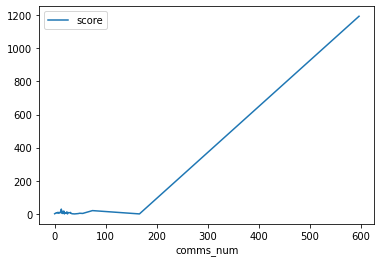

In [8]:
filtered_data.groupby("comms_num").agg({"score":"median"}).plot()
plt.show()

### It appears that when comments are higher than 200, the median reddit score is pretty high but let's see the correlation with years

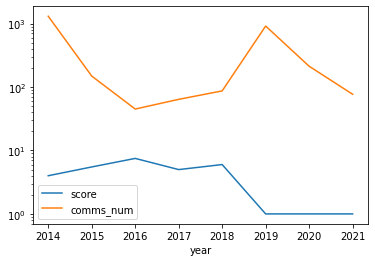

In [9]:
filtered_data.groupby("year").agg({"score":"median", "comms_num":"sum"}).plot()
plt.yscale("log")
plt.show()

### There are spike in vaccine myth discussion in 2014 and 2019. There is a drop in discussion between 2015 to 2018. A spike in 2019 and notice as the discussion in vaccine myth increases, the score also drops especially after 2019

### Let's finally print out a few of the texts that has high score

In [10]:
for _, row in (
    filtered_data.sort_values("score", ascending=False)
    .head(10).iterrows()):
    print(row["text"])
    print(row["score"])
    print("---"*20)

I would rage if this was handed to me...
1193
------------------------------------------------------------
From /r/Rage
44
------------------------------------------------------------
Do not give a platform for anti-vaxxers to propagate. I am of the mind to report social media groups that identify as anti-vaxxers as dangerous and miss-leading. Whether it’s a YouTube video or a Facebook Page, etc. My thinking is that such groups simply become more and more influential through confirmation bias and thus promote more people towards dangerous actions. When you visit these groups the degree of critical thinking and criticism drops because every statement no matter how ridiculous reinforces the same misleading theme that vaccines are bad. So now the claims are not just vaccines cause autism, it’s vaccines cause cancer, diabetes, Down syndrome, depression, genetic mutations, and so forth. And yes I have read all these ridiculous claims made by anti-vaxxers. The evolving implied insanity is be

 ### let's show texts that has very low score

In [11]:
for _, row in (
    filtered_data.sort_values("score")
    .head(10).iterrows()):
    print(row["text"])
    print(row["score"])
    print("---"*20)

well i DO. you disrespectful sheep. the natural scent lures out impurities in the mind and it’s our diseases! the crystals then kill these diseases on the outside
-12
------------------------------------------------------------
But that's after already deciding the claim is false.The claim is backed up by tons of real science, and facts.My main point here is that this doesn't necessarily make you an antivaxxer it just makes you a pro vaxxer that wants this to be known, fixed or proven unavoidable.
-11
------------------------------------------------------------
People with (not natural) immunity get the diseases😒😒😒😒Edit. Scaredy cats
-6
------------------------------------------------------------
>the CONCEPT that molecules are NOT the sum of their atomic parts ALWAYS shines throughOk, this is true, but thimerosal is still toxic and compounds of toxic heavy metals are still toxic in the VAST majority of cases>Do you know what mercuric, gold, or palladium catalysts are?Irrelevant but ye

### Let's check for engagements as well

* high engagement

In [12]:
for _, row in (
    filtered_data.sort_values("comms_num", 
    ascending=False)
    .head(10).iterrows()):
    print(row["text"])
    print(row["comms_num"])
    print("---"*20)

I would rage if this was handed to me...
596
------------------------------------------------------------
Myth- "There is no thimerosal (mercury) in vaccines." and yet...https://www.cdc.gov/flu/protect/vaccine/thimerosal.htm"Flu vaccines in multi-dose vials contain thimerosal to safeguard against contamination of the vial. Most single-dose vials and pre-filled syringes of flu shot and the nasal spray flu vaccine do not contain a preservative because they are intended to be used once."
166
------------------------------------------------------------
Dear Anti Vaccination movement, First of all, to not give your child vaccinations is completely illegal. Secondly, the fact that vaccines cause things like autism is bull crap. Autism is a condition that happens at birth. While the exact cause of autism is unknown, there is no scientific evidence that states vaccinations cause autism. Lastly, vaccinations contain very weak forms of the virus the vaccination protects you against. Your body pr

* low engagements

In [13]:
for _, row in (
    filtered_data.sort_values("comms_num")
    .head(10).iterrows()):
    print(row["text"])
    print(row["comms_num"])
    print("---"*20)

Health Canada approves AstraZeneca COVID-19 vaccine
0
------------------------------------------------------------
If parents are concerned about the effects of the MMR vaccine, I would suggest having their children get the vaccines separately. It's also not just people having their children skip the MMR vaccine, but all vaccines in general. Autism has been found to be genetic, and if you read the book Neurotribes, you will learn that autism diagnosis rates went up in the 1990s due to an expansion of the diagnosis criteria to include Asperger's syndrome. Children with Asperger's syndrome do not regress as toddlers like some kids with more severe autism do.
0
------------------------------------------------------------
Wow, you reading comprehension is scary. I've only read half of your "conclusions" that yoj got from the paragraphs and it's scary that someone doesn't understand shit from them. Also, group immunity is what makes the flu shot efficient, along with the strain match. Stop 

### Text through out the year 

* high score 

In [14]:
for year in sorted(filtered_data.year.unique()):
    for _, row in (
        filtered_data[filtered_data.year 
                      == year].sort_values(
            ["score"],ascending=False)
        .head(5).iterrows()
    ):
        print(year)
        print(row["text"])
        print(row["score"])
        print("---"*20)

2014
I would rage if this was handed to me...
1193
------------------------------------------------------------
2014
From /r/Rage
44
------------------------------------------------------------
2014
Meet my friend's anti-vax wife
30
------------------------------------------------------------
2014
Typical debate with an anti-vaxer (I'm teal)
27
------------------------------------------------------------
2014
Why Trust Scientists?
26
------------------------------------------------------------
2015
The most disgusting anti-vaxxer I've probably encountered to date.
17
------------------------------------------------------------
2015
How Anti-Vaxxers Sound to Normal People
16
------------------------------------------------------------
2015
Antivax mom makes concentration camp-style badge to protest her "persecution"
15
------------------------------------------------------------
2015
TIL: There are people who equate pediatric facilities which only treat vaccinated children with Jim Crow

* low score

In [15]:
for year in sorted(filtered_data.year.unique()):
    for _, row in (
        filtered_data[filtered_data.year 
                      == year].sort_values(
            ["score"])
        .head(5).iterrows()
    ):
        print(year)
        print(row["text"])
        print(row["score"])
        print("---"*20)

2014
I'm sure you all understand scientific theory is theory because science itself admits it doesn't fucking know... But all of you on your high horses with your bro-knowledge and half read studies know this and are being close minded gits because you've read more than everyone else and know more
0
------------------------------------------------------------
2014
I have seen the eyes of healthy children go to blank stares immediately after massive immunizations suddenly unable to track movement or even make eye contact with a parent again. As the owner of a preschool this cause/effect is described in detail every year at enrollment time by new parents
0
------------------------------------------------------------
2014
This is propaganda by a pro vaccine organisation.
0
------------------------------------------------------------
2014
Of course the scumbags in the pharmacutical industry heads got him banned easily after talking to the scumbags in londonstan . See instead of having sex 

* high engagements

In [16]:
for year in sorted(filtered_data.year.unique()):
    for _, row in (
        filtered_data[filtered_data.year 
                      == year].sort_values(
            ["comms_num"],ascending=False)
        .head(5).iterrows()
    ):
        print(year)
        print(row["text"])
        print(row["comms_num"])
        print("---"*20)

2014
I would rage if this was handed to me...
596
------------------------------------------------------------
2014
Long-winded, ill-researched diatribe over at r/conspiracy. Author admits that he's unable to think for himself.
55
------------------------------------------------------------
2014
Since the anti-vaccination movement doesn't have any facts on their side, their new tactic is to post gish-gallops.
46
------------------------------------------------------------
2014
My anti-vax aunt just posted this comment on an article, much more cogently argued than most posts I see, and since I'm not knowledgeable enough to specifically refute anything I was wondering if one of you were. She's a little bit of a conspiracy nut and is super into homeopathy, but she also has a Ph.D. and has written books, so the usual idiocy isn't on display (at least rhetorically). If everything she claims in this post is true, then vaccines are the devil. I know that's not the case, but I'm not knowledgea

* low engagements

In [17]:
for year in sorted(filtered_data.year.unique()):
    for _, row in (
        filtered_data[filtered_data.year 
                      == year].sort_values(
            ["comms_num"])
        .head(5).iterrows()
    ):
        print(year)
        print(row["text"])
        print(row["comms_num"])
        print("---"*20)

2014
It's simple logic that they are potentially developmentally damaging unless the ppm allowances established by the FDA are drastically lowered. I'm surprised with you all. Pandering Big Pharma's utter horsecrap and the illogical media response to a lousy research paper.
0
------------------------------------------------------------
2014
If the government is going to make it illegal for families to sue the manufacturer (Big Pharma) and force them to go to a special court just for vaccine cases (where they all lose) they have shown that nothing and nobody will get in the way of distributing it.
0
------------------------------------------------------------
2014
Anybody care to explain the recent Vaccine-settlement specific court that awarded a family a large sum of money for their son who started showing signs of autism after his vaccination?
0
------------------------------------------------------------
2014
However, hidden to most Americans was an elaborate Public Relations scheme 

### Appears that the high score reddit posts tend to be mostly pro vax and the low scores ones are anti vax related posts. The engagements can be either way. 

### Sentiment analysis and topic clustering with the reddit posts and associate them with scores. 

____

### Save the filtered data

In [20]:
filtered_data.to_csv("../data/filtered_data.csv", index=False)